In [113]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
og_df = pd.read_csv('filt_pm.csv')
og_df = og_df.drop("FactValueNumericLow", axis=1).drop("FactValueNumericHigh", axis=1).drop("Value", axis=1)
og_df.rename(columns={'FactValueNumeric': 'Value'}, inplace=True)
og_df.drop(og_df.filter(regex="Unname"), axis=1, inplace=True)
fullDf = og_df.copy()
og_df = og_df.head(10)
og_df

,Location,Period,Value
0,Latvia,2016,10.00
1,Luxembourg,2016,10.02
2,San Marino,2016,10.06
3,San Marino,2016,10.06
4,Denmark,2016,10.11
5,Switzerland,2016,10.11
6,Marshall Islands,2016,10.20
7,Marshall Islands,2016,10.20
8,Luxembourg,2016,10.20
9,Germany,2016,10.23


In [115]:
# Generate Random NaNs in the dataframe
df = og_df.copy()
ix = [(row, 2) for row in range(df.shape[0]) for col in range(df.shape[1])]
for row, col in random.sample(ix, int(round(0.2*len(ix)))):
    df.iat[row, 2] = np.nan
df

,Location,Period,Value
0,Latvia,2016,10.00
1,Luxembourg,2016,10.02
2,San Marino,2016,10.06
3,San Marino,2016,10.06
4,Denmark,2016,NaN
5,Switzerland,2016,NaN
6,Marshall Islands,2016,NaN
7,Marshall Islands,2016,NaN
8,Luxembourg,2016,10.20
9,Germany,2016,NaN


In [116]:
# Filling method
newdf = df.interpolate()
if newdf["Value"].isnull().values.any():
    newdf = newdf.fillna(method='bfill')
newdf

,Location,Period,Value
0,Latvia,2016,10.000
1,Luxembourg,2016,10.020
2,San Marino,2016,10.060
3,San Marino,2016,10.060
4,Denmark,2016,10.088
5,Switzerland,2016,10.116
6,Marshall Islands,2016,10.144
7,Marshall Islands,2016,10.172
8,Luxembourg,2016,10.200
9,Germany,2016,10.200


In [117]:
newset2 = df.fillna(method='ffill')
if newset2["Value"].isnull().values.any():
    newset2 = newset2.fillna(method='bfill')
newset2

,Location,Period,Value
0,Latvia,2016,10.00
1,Luxembourg,2016,10.02
2,San Marino,2016,10.06
3,San Marino,2016,10.06
4,Denmark,2016,10.06
5,Switzerland,2016,10.06
6,Marshall Islands,2016,10.06
7,Marshall Islands,2016,10.06
8,Luxembourg,2016,10.20
9,Germany,2016,10.20


In [118]:
newset3 = df.fillna(method='bfill')
if newset3["Value"].isnull().values.any():
    newset3 = newset3.fillna(method='ffill')
newset3

,Location,Period,Value
0,Latvia,2016,10.00
1,Luxembourg,2016,10.02
2,San Marino,2016,10.06
3,San Marino,2016,10.06
4,Denmark,2016,10.20
5,Switzerland,2016,10.20
6,Marshall Islands,2016,10.20
7,Marshall Islands,2016,10.20
8,Luxembourg,2016,10.20
9,Germany,2016,10.20


In [119]:
# Mean
meanFill = df.fillna(value=df["Value"].mean())
meanFill

,Location,Period,Value
0,Latvia,2016,10.000
1,Luxembourg,2016,10.020
2,San Marino,2016,10.060
3,San Marino,2016,10.060
4,Denmark,2016,10.068
5,Switzerland,2016,10.068
6,Marshall Islands,2016,10.068
7,Marshall Islands,2016,10.068
8,Luxembourg,2016,10.200
9,Germany,2016,10.068


In [120]:
# Median
medianFill = df.fillna(value=df["Value"].median())
medianFill

,Location,Period,Value
0,Latvia,2016,10.00
1,Luxembourg,2016,10.02
2,San Marino,2016,10.06
3,San Marino,2016,10.06
4,Denmark,2016,10.06
5,Switzerland,2016,10.06
6,Marshall Islands,2016,10.06
7,Marshall Islands,2016,10.06
8,Luxembourg,2016,10.20
9,Germany,2016,10.06


In [121]:
# Mode
modeFill = df.fillna(value=df["Value"].mode()[0])
modeFill

,Location,Period,Value
0,Latvia,2016,10.00
1,Luxembourg,2016,10.02
2,San Marino,2016,10.06
3,San Marino,2016,10.06
4,Denmark,2016,10.06
5,Switzerland,2016,10.06
6,Marshall Islands,2016,10.06
7,Marshall Islands,2016,10.06
8,Luxembourg,2016,10.20
9,Germany,2016,10.06


In [122]:
# Euclidean Distance
def Euclidean_Dist(df1, df2, cols="Value"):
    return np.linalg.norm(df1[cols].values - df2[cols].values)
data = {
    "Linear Interpolation": round(Euclidean_Dist(og_df, newdf), 3),
    "Forward Fill": round(Euclidean_Dist(og_df, newset2), 3),
    "Backward Fill": round(Euclidean_Dist(og_df, newset3), 3),
    "Mean": round(Euclidean_Dist(og_df, meanFill), 3),
    "Median": round(Euclidean_Dist(og_df, medianFill), 3),
    "Mode": round(Euclidean_Dist(og_df, modeFill), 3)
}

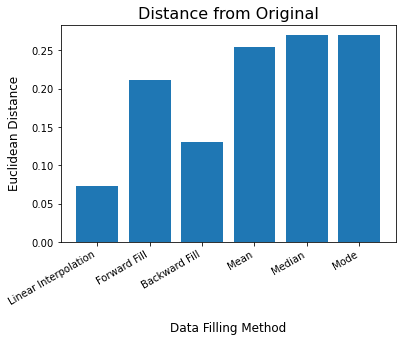

In [123]:
x = list(data.keys())
y = list(data.values())
plt.xlabel('Data Filling Method', labelpad=15, fontdict={'size': 12})
plt.ylabel('Euclidean Distance', labelpad=10, fontdict={'size': 12})
plt.title('Distance from Original', fontdict={'fontsize': 16})
ax = plt.subplot()
plt.bar(x, y)
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.show()

In [125]:
# Filling whole dataset using linear interpolation
fullDf = fullDf.interpolate()
if fullDf["Value"].isnull().values.any():
    fullDf = fullDf.fillna(method='bfill')
fullDf.to_csv('pm25_interpolate.csv', sep=',', index=False)
fullDf

,Location,Period,Value
0,Latvia,2016,10.00
1,Luxembourg,2016,10.02
2,San Marino,2016,10.06
3,San Marino,2016,10.06
4,Denmark,2016,10.11
...,...,...,...
4027,United States of America,2010,9.44
4028,Portugal,2010,9.48
4029,Norway,2010,9.50
4030,Japan,2010,9.90
